In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stress_profile(bases, gammas, k0, gw, gamma_w=9.81, q=0):
    """
    Calculate profile of vertical and horizontal stresses
    in a soil mass consisting of a number of horizontal layers.
    The ground surface is at depth 0, and the layers are
    defined by their bases' depths, gammas and k0 arrays.
    Input:
    bases: array of layer bases' depths in meters
    gammas: array of layer unit weights in kN/m3
    k0: effective coefficient of earth pressure at rest,
        input an array of zeros if no horizontal stress is required
    gw: groundwater level in meters
    gamma_w: unit weight of water, kN/m3
    q: surcharge load in kN/m2
    """
    
    # Check if the input arrays have the same length
    if len(bases) != len(gammas) or len(bases) != len(k0):
        print("Error: The input arrays must have the same length")
        return

    # Number of layers
    n = len(bases)
    
    # Initialize arrays
    sz_total = np.zeros(n+1) # total vertical stress
    u = np.zeros(n+1) # pore water pressure
    sz_eff = np.zeros(n+1) # effective vertical stress
    sx_eff = np.zeros(n+1) # effective horizontal stress
    sx_total = np.zeros(n+1) # total horizontal stress
    # Add surcharge to the top layer
    sz_total[0] = q
    sz_eff[0] = q
    if k0[0] > 0:
        sx_eff[0] = k0[0] * q
        sx_total[0] = k0[0] * q
    
    # insert 0 at start of bases since the ground surface is at depth 0
    bases = np.insert(bases, 0, 0)
    
    # Calculate stresses
    for i in range(n):
        # total vertical stress at the base of the layer
        sz_total[i+1] = sz_total[i] + gammas[i]*(bases[i+1] - bases[i])
        # pore water pressure at the base of the layer
        if bases[i+1] > gw:
            u[i+1] = gamma_w*(bases[i+1] - gw)
        # effective vertical stress at the base of the layer      
        sz_eff[i+1] = sz_total[i+1] - u[i+1]
        # if horizontal stress is required
        if k0[i] > 0:
            # effective horizontal stress at the base of the layer
            sx_eff[i+1] = k0[i] * sz_eff[i+1]
            # total horizontal stress at the base of the layer
            sx_total[i+1] = sx_eff[i+1] + u[i+1]

    # print results, with 2 decimal places
    if k0[0] > 0:
        print("Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)  σ_x' (kPa)  σ_x (kPa)")
        print('------------------------------------------------------------------')
    else:
        print("Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)")
        print('------------------------------------------')
    for i in range(n+1):
        if k0[0] > 0:
            print('{:6.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'.format(bases[i], sz_total[i], u[i], sz_eff[i], sx_eff[i], sx_total[i]))
        else:
            print('{:6.2f} {:10.2f} {:10.2f} {:10.2f}'.format(bases[i], sz_total[i], u[i], sz_eff[i]))

    # curves to plot
    n_curves = 3
    curves = [sz_total, u, sz_eff]
    titles = ['Total vertical stress (kPa)', 'Pore water pressure (kPa)', 
              'Effective vertical stress (kPa)']
    if k0[0] > 0:
        n_curves = 5
        curves.extend([sx_eff, sx_total])
        titles.extend(['Effective horizontal stress (kPa)', 'Total horizontal stress (kPa)'])
    
    # Make a figure the different curves side by side
    fig, ax = plt.subplots(1, n_curves, figsize=(12, 6))
    # round the maximum value of the curves to the nearest 10
    rounded_num = np.ceil(max(curves[0]) / 10) * 10
        
    for i in range(n_curves):
        ax[i].plot(curves[i], bases, 'b-', marker='o', markerfacecolor='red', markeredgecolor='red')
        ax[i].grid(True)
        ax[i].set_xlabel(titles[i])
        ax[i].xaxis.set_label_position('top')
        ax[i].xaxis.tick_top()
        ax[i].set_xlim([0, rounded_num])
        if i == 0:
            ax[i].set_ylabel('Depth (m)')
        ax[i].set_ylim([bases[-1]+1, bases[0]])
        
    # avoid overlap of the subplots
    fig.tight_layout()

    plt.show()

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  4.00      64.84       0.00      64.84
 14.00     272.94      98.10     174.84


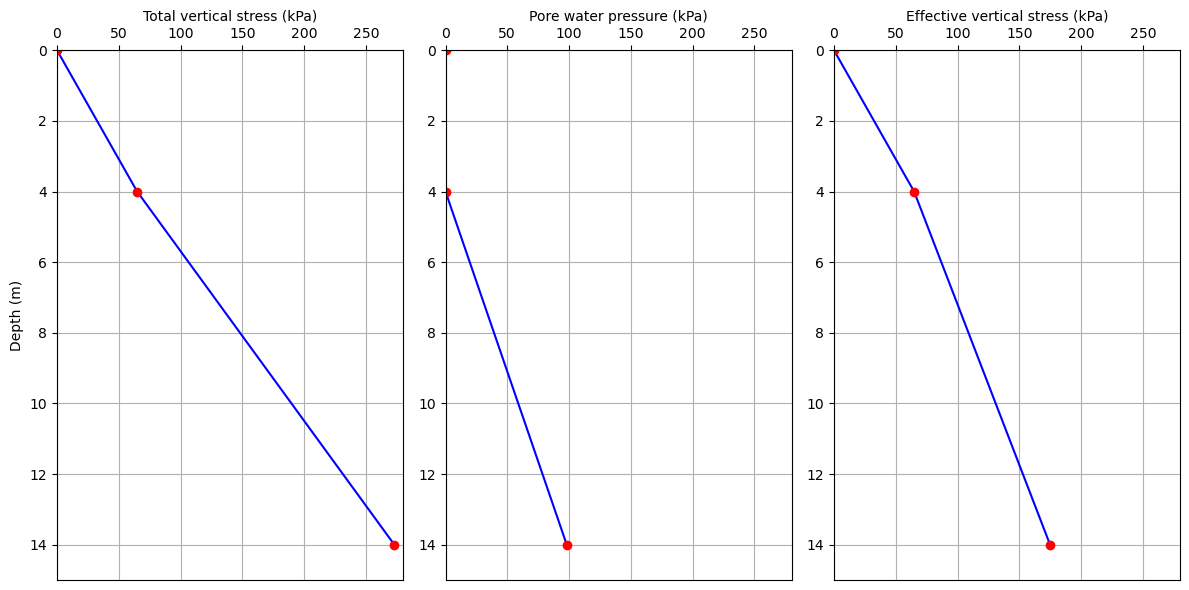

In [3]:
# Lecture 7, example 1a
# This is example 9.1 in Das (20022) Geotechnical Engineering
bases = np.array([4, 14])
gammas = np.array([16.21, 20.81])
k0 = np.array([0, 0])
gw = 4
stress_profile(bases, gammas, k0, gw)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  2.00      32.42       0.00      32.42
  4.00      72.26      19.62      52.64
 14.00     280.36     117.72     162.64


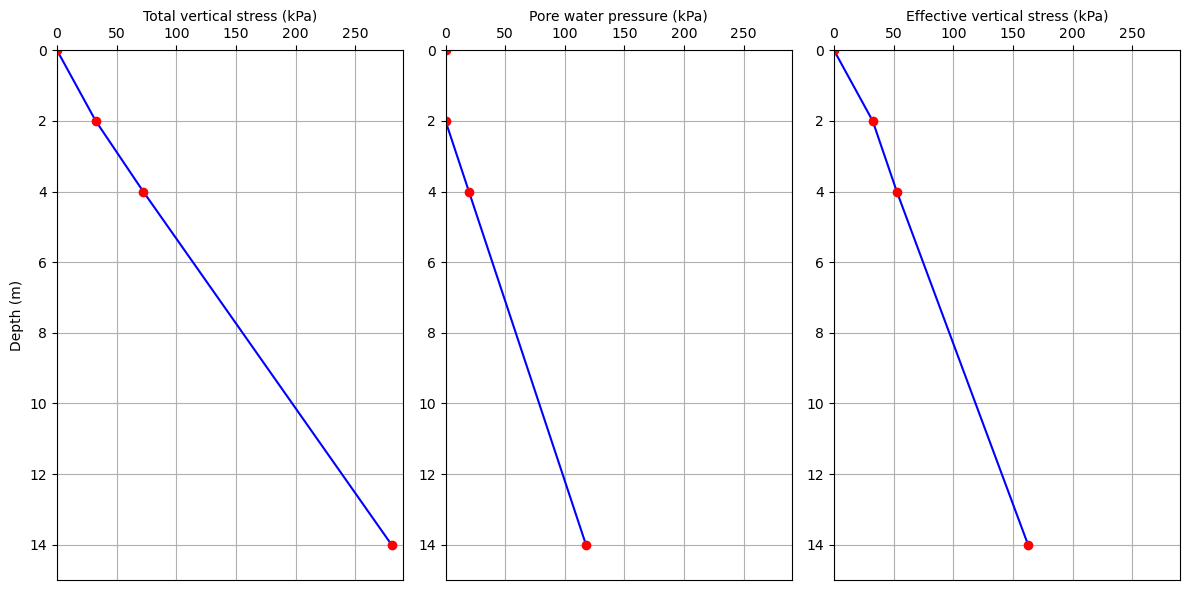

In [4]:
# Lecture 7, example 1b
# This is example 9.1 in Das (20022) Geotechnical Engineering
bases = np.array([2, 4, 14])
gammas = np.array([16.21, 19.92, 20.81])
k0 = np.array([0, 0, 0])
gw = 2
stress_profile(bases, gammas, k0, gw)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)  σ_x' (kPa)  σ_x (kPa)
------------------------------------------------------------------
  0.00     100.00       0.00     100.00      55.00      55.00
  2.00     138.00       0.00     138.00      75.90      75.90
  5.00     198.00      30.00     168.00      92.40     122.40


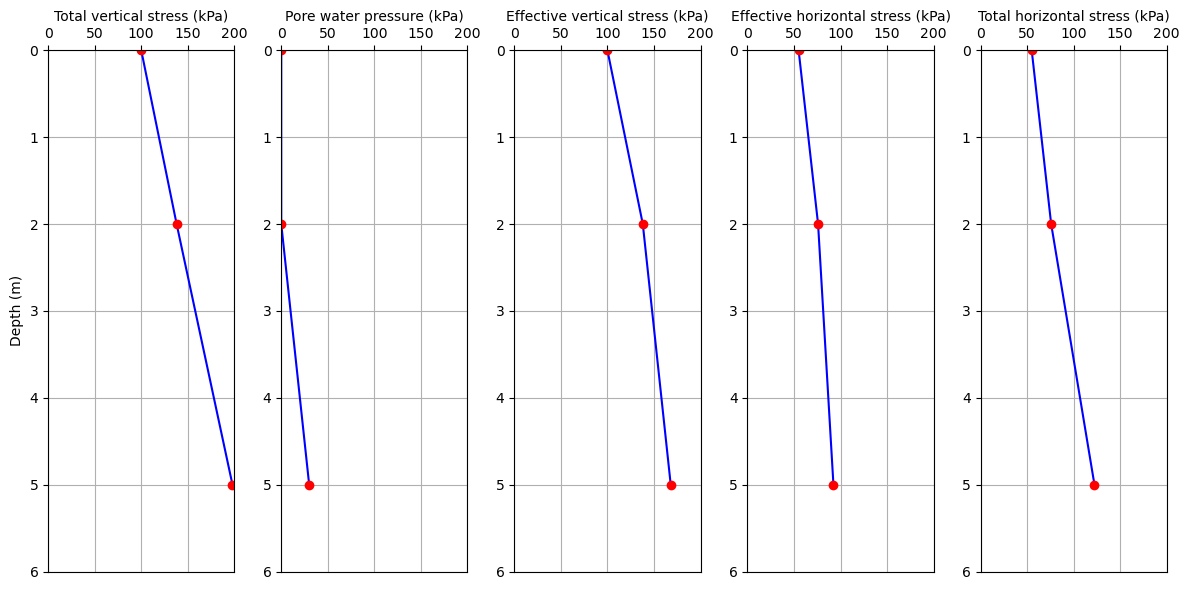

In [5]:
# Lecture 8, example 1
# This is example 3.5 in Aarhaug (1992) Geoteknikk
bases = np.array([2, 5])
gammas = np.array([19.0, 20.0])
k0 = np.array([0.55, 0.55])
gw = 2
gamma_w = 10.0
q = 100 # surcharge in kN/m2
stress_profile(bases, gammas, k0, gw, gamma_w, q)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  4.00      71.81       0.00      71.81
 10.00     191.88      58.86     133.02


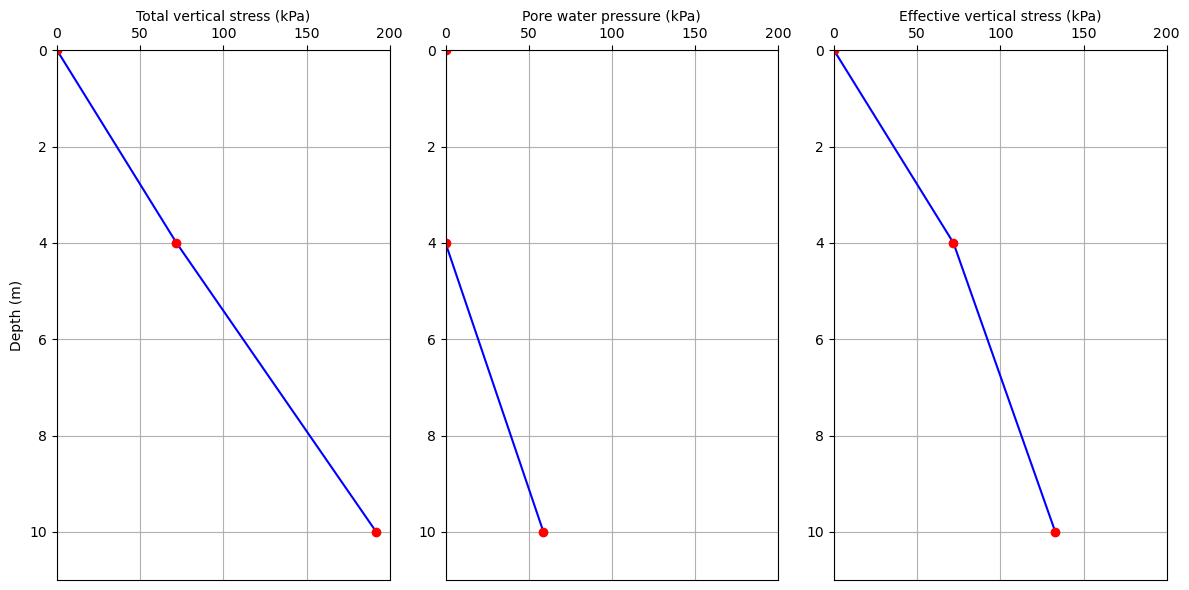

In [6]:
# First exercise for lecture 7
# This is problem 3.1 in Aarhaug (1992) Geoteknikk
bases = np.array([4, 10])
g = 9.81
densities = np.array([1.83, 2.04])
gammas = densities * g
k0 = np.array([0, 0])
gw = 4
gamma_w = 1.0 * g

stress_profile(bases, gammas, k0, gw, gamma_w)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)
------------------------------------------
  0.00       0.00       0.00       0.00
  4.00      71.81      39.24      32.57
 10.00     191.88      98.10      93.78


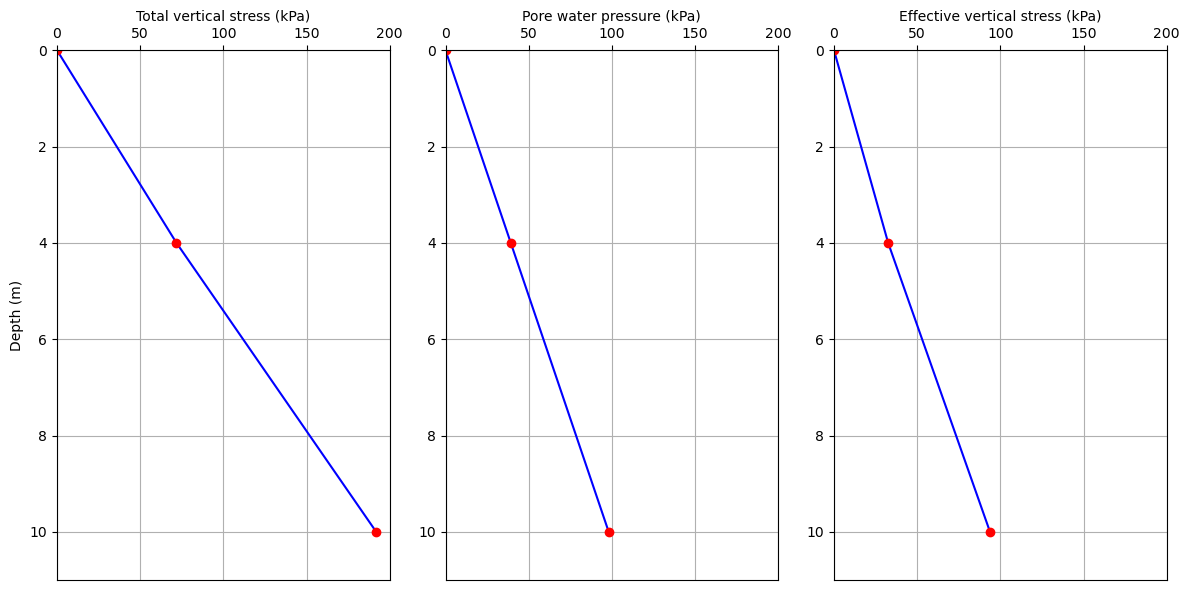

In [7]:
# Continuation of problem 3.1
# the groundwater rises up to the ground surface
# This is problem 2.2 in Aarhaug (1991): Geoteknikk 1
gw = 0
stress_profile(bases, gammas, k0, gw, gamma_w)

Depth (m)  σ_z (kPa)  u (kPa)  σ_z' (kPa)  σ_x' (kPa)  σ_x (kPa)
------------------------------------------------------------------
  0.00       0.00       0.00       0.00       0.00       0.00
  2.00      37.08       0.00      37.08      16.69      16.69
  4.00      75.14      19.62      55.52      24.99      44.61
 11.00     222.10      88.29     133.81      80.29     168.58


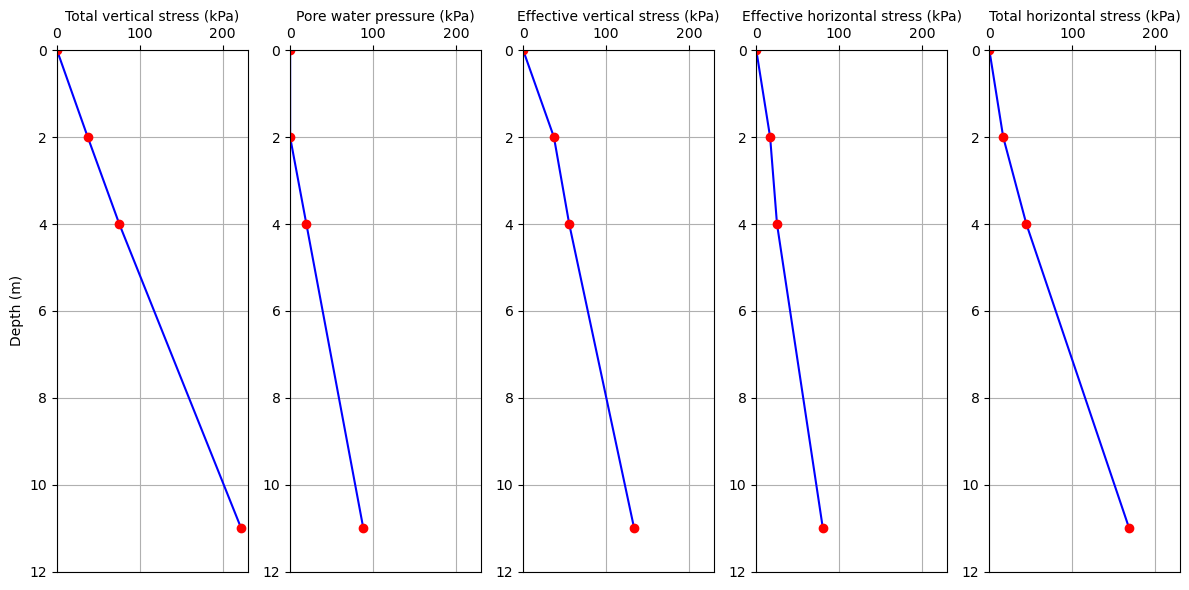

In [8]:
# First exercise for lecture 8
# This is problem 3.2 in Aarhaug (1992) Geoteknikk
bases = np.array([2, 4, 11])
g = 9.81
densities = np.array([1.89, 1.94, 2.14])
gammas = densities * g
k0 = np.array([0.45, 0.45, 0.6])
gw = 2.0
gamma_w = 1.0 * g

stress_profile(bases, gammas, k0, gw, gamma_w)

In [9]:
tau_max = (133.81 - 80.29) / 2
print("Maximum shear stress = {:.2f} kPa".format(tau_max))

Maximum shear stress = 26.76 kPa
